<a href="https://colab.research.google.com/github/IleniIsac/isac/blob/main/Mid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implement  simple autoencoder for dimentionality reduction on a dataset of grayscale images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Dimensions
input_shape = (28, 28, 1)
encoding_dim = 64  # Dimension of the compressed layer

# Encoder
input_img = Input(shape=input_shape)
x = Flatten()(input_img)
encoded = Dense(encoding_dim, activation='relu')(x)

# Decoder
decoded = Dense(28 * 28, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Train the model
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3514 - val_loss: 0.1606
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1512 - val_loss: 0.1264
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1227 - val_loss: 0.1080
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1065 - val_loss: 0.0974
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0968 - val_loss: 0.0906
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0902 - val_loss: 0.0857
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0855 - val_loss: 0.0821
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0822 - val_loss: 0.0796
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0800 - val_loss: 0.0778
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0781 - val_loss: 0.0766
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0772 - val_loss: 0.0757
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


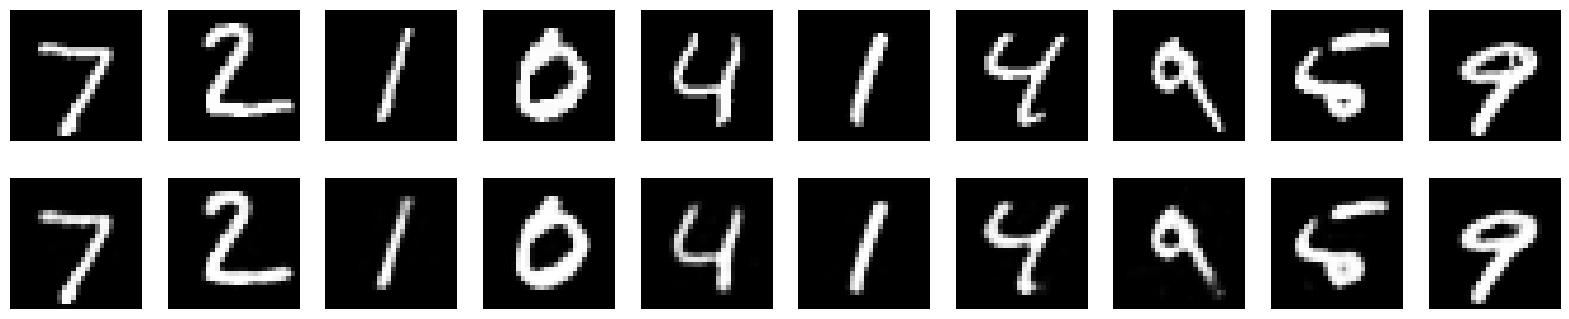

In [ ]:
# Encode and decode some test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
